## Loading Dependencies and Data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

## Helper Functions

In [2]:
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)
    
    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    
    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

# Types of Simple Dimensionality Reduction Algorithms/Methods

1. Principle Component Analysis (PCA)
2. Multi-dimensional Scaling (MDS)
3. T-distributed Stochastic Neighbor Embedding (t-SNE)

# 1. Principle Component Analysis (PCA) :

가장 높은 분산을 가진 데이터의 축을 찾아 해당 축으로 차원을 축소하는 차원 축소 기법

## Using PCA to find the first two Principal Components of the Breast Cancer Dataset :

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

canc_norm = StandardScaler().fit(X_canc).transform(X_canc)  

pca = PCA(n_components = 2).fit(canc_norm) #Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


## Plotting the PCA-Transformed Version of the Breast Cancer Dataset :

피처의 개수를 2개로 줄여 피처 간의 상관관계 확인과 시각화를 용이하게 함.

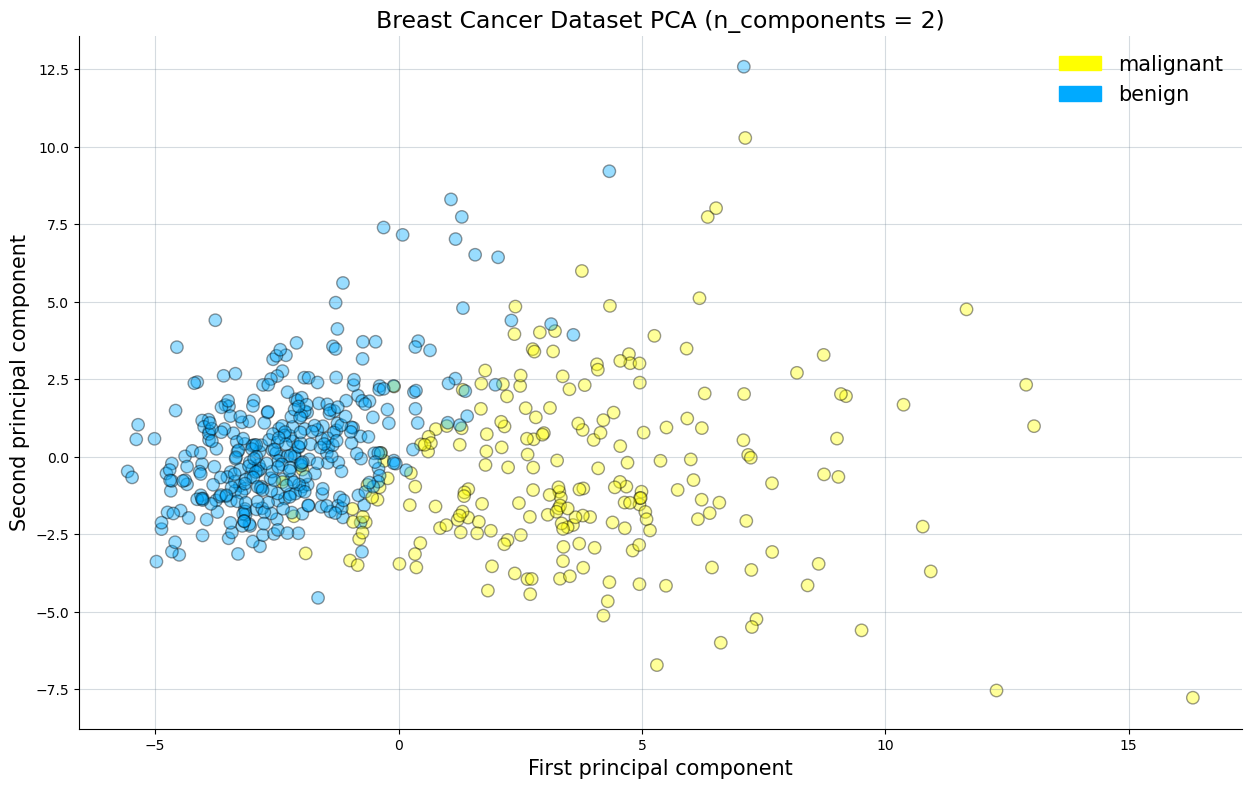

In [4]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

## Using PCA to get feature Co-Relation Between the Initial 30 Features

히트맵을 통해 기존 피처와 축소된 피처 간의 상관관계를 시각화하여 알아보자

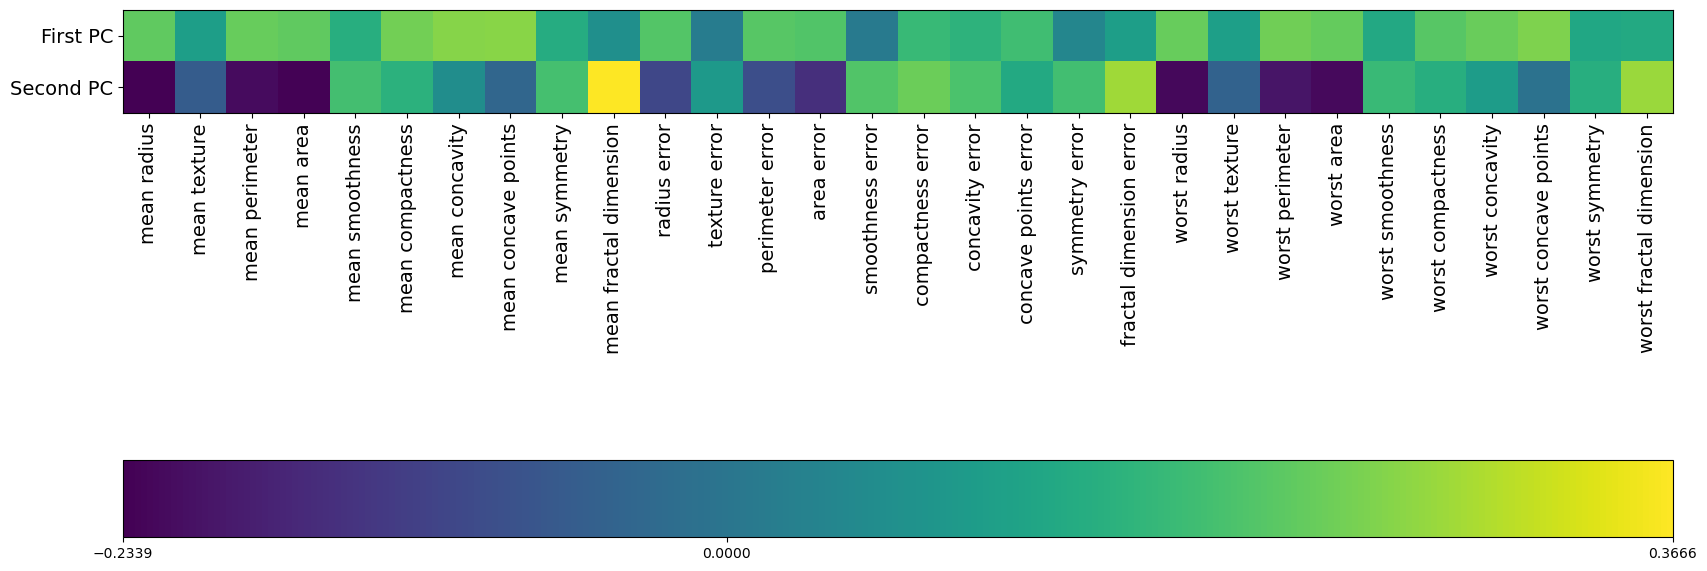

In [5]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.5);

첫번째 피처는 모두 양의 상관관계를 가져 함께 증가하고 감소함을 알 수 있음
두번째 피처는 음의 상관관계가 일부 존재함을 알 수 있음.

# 2. Multi-Dimensional Scaling : (MDS)

Mainfold Learning Algorithm의 일종으로 고차원 구조를 저차원 구조로 변환한다. 기존 데이터 공간에서 두 점의 거리를 보존하여 차원을 변환시킨다.

## Using MDS on the Breast Cancer Dataset :

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


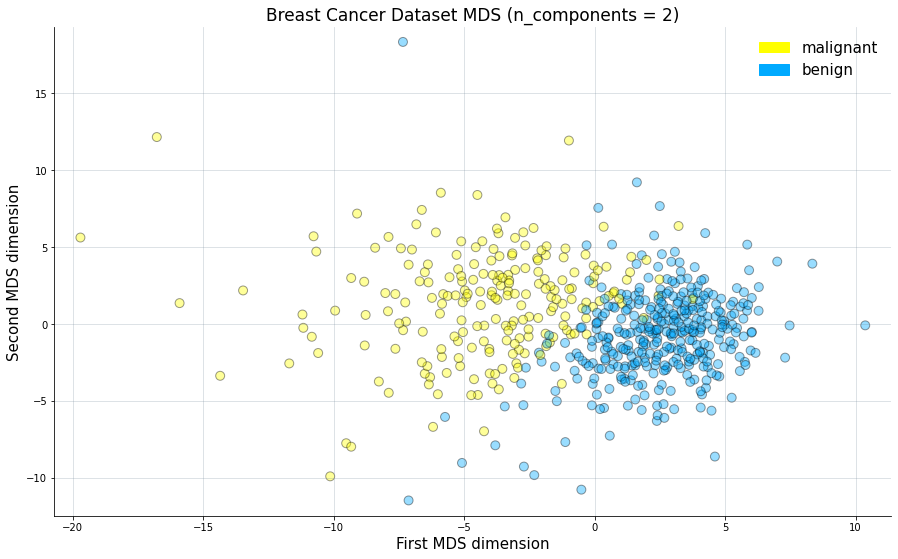

In [6]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);

# 3. T-distributed Stochastic Neighbor Embedding (t-SNE)

Mainfold Learning Algorithm의 일종으로 고차원 데이터를 2차원 데이터로 축소하며 시각화에 주로 사용된다. 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다.

## Using T-SNE on the Breast Cancer Dataset :

C:\Users\82102\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


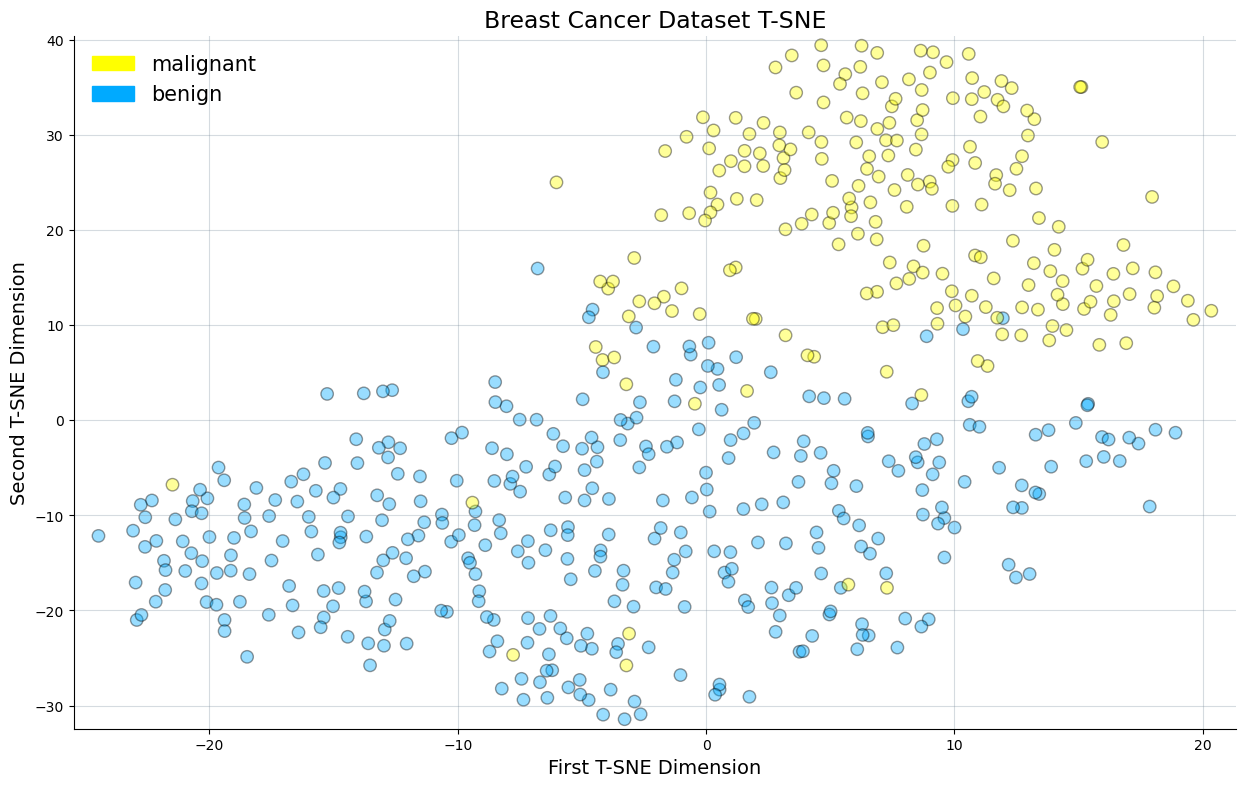

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);